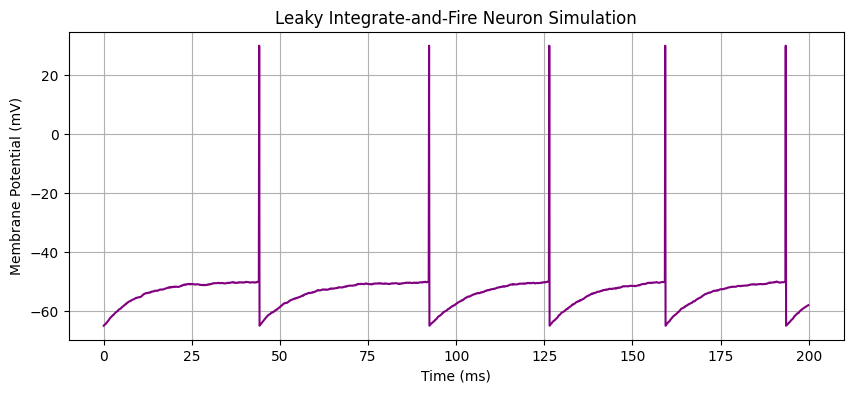

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



tau_m = 10.0       # ms
V_rest = -65.0     # mV
V_reset = -65.0    # mV
V_thresh = -50.0   # mV
R_m = 10.0         # MΩ
dt = 0.1           # ms
t_sim = 200        # total simulation time in ms


time = np.arange(0, t_sim, dt)

I_input = np.random.normal(1.5, 0.5, size=len(time))  # mean 1.5 nA, std dev 0.5


V = np.zeros(len(time))
V[0] = V_rest

for i in range(1, len(time)):
    if V[i-1] == 30.0:
        V[i] = V_reset
    else:
        dV = dt / tau_m * (-(V[i-1] - V_rest) + R_m * I_input[i-1])
        V[i] = V[i-1] + dV
        if V[i] >= V_thresh:
            V[i] = 30.0


plt.figure(figsize=(10, 4))
plt.plot(time, V, color='purple')
plt.title("Leaky Integrate-and-Fire Neuron Simulation")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.grid()
plt.show()